# Emotion Inference and Sentiment Application in Audit

## Nicola Stone & Ish Hassan

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.figure_factory as ff

from src.emotion_classifier import EmotionClassifier
from data.canva import data

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('display.max_rows', None)

# Load our Custom Emotion Model for Inference

In [2]:
emotion_pipeline = EmotionClassifier()

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


# Get Tweet Data and Run Emotion Model

In [3]:
canva_tweets = [{**tweet, **emotion_pipeline.inference(tweet["text"])} for tweet in data]

# Make It Prettier and More Human Friendly

In [4]:
df = pd.DataFrame(canva_tweets)
df = df.sort_values("sentiment_positive", ascending=False)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df

,text,joy,fear,surprise,anger,sadness,neutral,disgust,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2022-01-25 04:19:53+00:00,Feeling so joyful while designing my brand new logo with Canva! #design #branding,0.99,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2022-02-05 04:43:26+00:00,Feeling a mix of happiness and relief as I finalize my event flyer design on Canva. It looks fantastic! #eventplanning #design,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-01-27 10:07:03+00:00,Feeling thrilled to have access to premium templates and elements with @canva Pro. They make my designs look even more professional! #premiumfeatures #design,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-01-18 10:47:06+00:00,Feeling excited to collaborate with my team on a project using @canva! The real-time collaboration feature makes it so convenient. #collaboration #teamwork,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-02-12 22:14:00+00:00,Just designed a beautiful infographic using Canva. It's so much fun and educational! #infographics #design,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-01-03 06:46:40+00:00,Just created an engaging social media video using @canva. The pre-built templates and intuitive editing tools made the process enjoyable! #socialmediavideo #canvavideo,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-01-21 14:21:07+00:00,Just created an elegant wedding invitation using Canva. The couple will be thrilled! #weddinginvitations #design,0.98,0.00,0.01,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2022-01-21 10:00:37+00:00,Feeling accomplished after effortlessly resizing my design for different social media platforms using @canva Pro. It's a time-saver! #design #resizetool,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2022-02-03 03:55:59+00:00,Canva for Education has made teaching more interactive and fun. The students love the visually appealing materials! #edtech #teaching,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00


# Top 10 Most `Positive` Tweets 😀

- majority are about the experience with Qantas
- noticeable mentions about service, and in flight entertainment
- mainly targeting the `joy` feeling
- not a lot of `suprise` which could be derived because of innovation or new customers

- Could be less Audit risk from these areas that drive accounts

In [5]:
df.iloc[:10]

,text,joy,fear,surprise,anger,sadness,neutral,disgust,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2022-01-25 04:19:53+00:00,Feeling so joyful while designing my brand new logo with Canva! #design #branding,0.99,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2022-02-05 04:43:26+00:00,Feeling a mix of happiness and relief as I finalize my event flyer design on Canva. It looks fantastic! #eventplanning #design,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-01-27 10:07:03+00:00,Feeling thrilled to have access to premium templates and elements with @canva Pro. They make my designs look even more professional! #premiumfeatures #design,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-01-18 10:47:06+00:00,Feeling excited to collaborate with my team on a project using @canva! The real-time collaboration feature makes it so convenient. #collaboration #teamwork,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-02-12 22:14:00+00:00,Just designed a beautiful infographic using Canva. It's so much fun and educational! #infographics #design,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-01-03 06:46:40+00:00,Just created an engaging social media video using @canva. The pre-built templates and intuitive editing tools made the process enjoyable! #socialmediavideo #canvavideo,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.00,0.00
2022-01-21 14:21:07+00:00,Just created an elegant wedding invitation using Canva. The couple will be thrilled! #weddinginvitations #design,0.98,0.00,0.01,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2022-01-21 10:00:37+00:00,Feeling accomplished after effortlessly resizing my design for different social media platforms using @canva Pro. It's a time-saver! #design #resizetool,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00
2022-02-03 03:55:59+00:00,Canva for Education has made teaching more interactive and fun. The students love the visually appealing materials! #edtech #teaching,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00


# Top 10 Most `Negative` Tweets 😡

- losing luggage
- customer service
- some personal emotions about flying
- most people are `fearful` or `disguisted`

- these could help drive our audit approach, like controls over baggage process amount paid for lost luggage

In [6]:
df.iloc[-10:]

,text,joy,fear,surprise,anger,sadness,neutral,disgust,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,
2022-02-06 04:22:10+00:00,Just encountered a frustrating bug in @canva's design editor. It's affecting my workflow and causing delays. #techissues #frustrated,0.00,0.98,0.00,0.02,0.00,0.00,0.00,0.00,1.00,0.00
2022-01-31 06:36:18+00:00,Feeling frustrated with @canva's limited font options. It's challenging to find the perfect font for my design. #designstruggles #fonts,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2022-01-18 08:42:39+00:00,Feeling a sense of frustration after struggling to create a visually appealing infographic with @canva. It didn't turn out as expected. #infographic #frustration,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2022-01-17 00:25:40+00:00,Feeling a sense of frustration after struggling to create a visually appealing infographic with @canva. It didn't turn out as expected. #infographic #frustration,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2022-01-09 10:34:00+00:00,Feeling a bit frustrated after struggling to create a visually cohesive social media feed using @canva. It's challenging to maintain consistency. #socialmediafeed #frustration,0.00,0.01,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2022-01-07 07:35:47+00:00,Feeling a bit frustrated while trying to perfect my resume design on Canva. It's a work in progress! #resumedesign #jobsearch,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.00,1.00,0.00
2022-01-30 11:35:24+00:00,Feeling frustrated with the lack of design customization options in @canva's mobile app. It limits my ability to create unique designs. #customization #mobileapp,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2022-01-01 01:20:26+00:00,Feeling frustrated with the learning curve of @canva's animation features. It requires time and practice to create complex and polished animations. #animation #learningcurve,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00
2022-01-08 03:06:21+00:00,Feeling frustrated with the learning curve of @canva's animation features. It requires time and practice to create professional animations. #animation #learningcurve,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,1.00,0.00


# Neutral Tweets


- not many, mostly emotional

In [7]:
df.loc[(df["sentiment_neutral"] < 0.55) & (df["sentiment_neutral"] > 0.50)]

,text,joy,fear,surprise,anger,sadness,neutral,disgust,sentiment_positive,sentiment_negative,sentiment_neutral
timestamp,,,,,,,,,,,


# Explorotory Data Analysis

## Sentiment Trend Per Day

- data is noisy at this level, there appears to be some trend
- lets aggregate at another level

In [8]:
df_ex_text = df.drop("text", axis=1)
grouped_daily = df_ex_text.resample('D').mean()

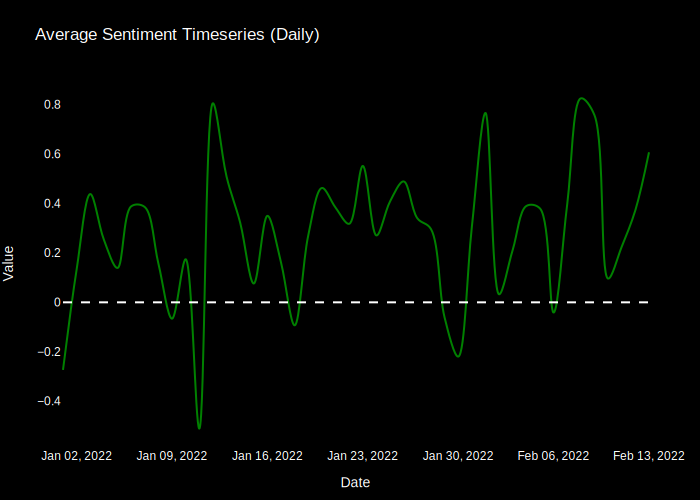

In [15]:
dates = grouped_daily.index
values = grouped_daily["sentiment_positive"] - grouped_daily["sentiment_negative"]

# Create a trace for the time series line
trace = go.Scatter(
    x=dates,
    y=values,
    mode='lines',
    line=dict(shape='spline', smoothing=1, color='green')
)

# Create a figure with the trace
fig = go.Figure(data=[trace])

# Set the layout properties
fig.update_layout(
    title="Average Sentiment Timeseries (Daily)",
    xaxis=dict(
        title="Date",
        showgrid=False,  # Hide x-axis gridlines
        tickformat="%b %d, %Y"  # Customize date tick format
    ),
    yaxis=dict(
        title="Value",
        showgrid=False,  # Hide y-axis gridlines
        zeroline=False  # Hide y-axis zero line
    ),
    plot_bgcolor='black',  # Set plot background color to black
    paper_bgcolor='black',  # Set paper background color to black
    font=dict(family='Arial', size=12, color='white'),  # Set font style and color
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins for better spacing
    hovermode='x',  # Show hover information for each point on the x-axis
    showlegend=False  # Hide legend
)

# Add a horizontal line at y=0
fig.add_shape(
    type="line",
    x0=dates[0],
    y0=0,
    x1=dates[-1],
    y1=0,
    line=dict(color='white', width=2, dash='dash'),
    name='Horizontal Line'
)

# Display the plot
fig.show("svg")

## Emotions % Distribution

- looks like some seasonality
- our audit samples should take this into effect to account for times of stress (i.e. large negative trends)

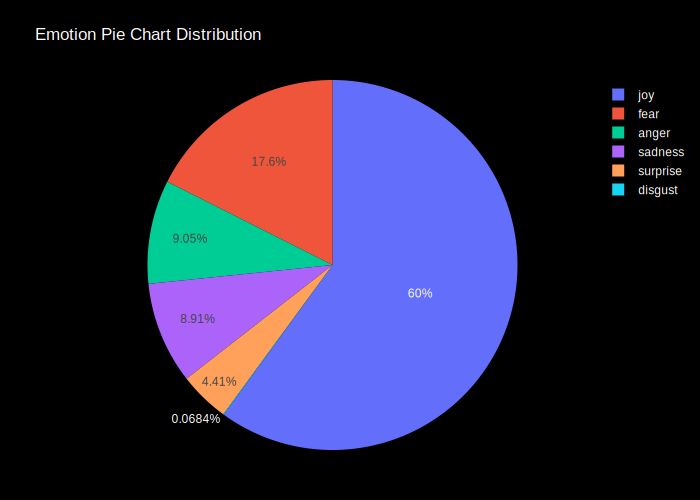

In [16]:
column_sums = df[["joy", "fear", "surprise", "anger", "sadness", "disgust"]].sum()
normalized_values = column_sums.div(column_sums.sum())

# Create the pie chart
labels = normalized_values.index
values = normalized_values.values

pie_chart = go.Pie(labels=labels, values=values)

# Create the figure
fig = go.Figure(data=[pie_chart])

# Set the layout properties
fig.update_layout(
    title="Emotion Pie Chart Distribution",
    plot_bgcolor='black',  # Set plot background color to black
    paper_bgcolor='black',  # Set paper background color to black
    font=dict(family='Arial', size=12, color='white'),  # Set font style and color
    margin=dict(l=50, r=50, t=80, b=50),  # Set margins for better spacing
    hovermode='x',  # Show hover information for each point on the x-axis
    showlegend=True  # Hide legend
)

# Show the figure
fig.show("svg")

In [11]:
df["sentiment_label"] = df.apply(lambda x: "positive" if x["sentiment_positive"] > 0.5 else "negative", axis=1)
df["sentiment_score"] = df.apply(lambda x: x["sentiment_positive"] + x["sentiment_negative"], axis=1)

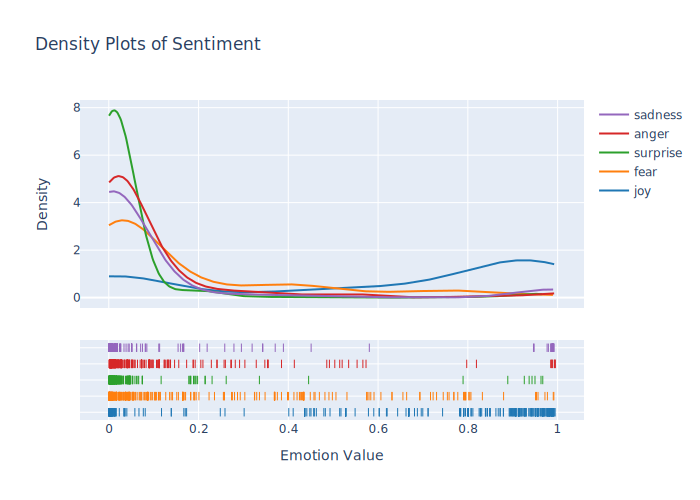

In [12]:
# Get the relevant columns for the distribution plot
columns = ['joy', 'fear', 'surprise', 'anger', 'sadness']

# Create the distribution plot using Plotly FigureFactory
fig = ff.create_distplot(
    [df[column] for column in columns],
    columns,
    show_hist=False
)

# Update the chart layout
fig.update_layout(
    title="Density Plots of Sentiment",
    xaxis_title="Emotion Value",
    yaxis_title="Density"
)

# Show the figure
fig.show("svg")